In [14]:
import os
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from PIL import Image

def resize_image(image_path, output_size, image_name):
    image = Image.open(image_path)
    width, height = image.size
    max_dim = max(width, height)
    scale = output_size / max_dim
    new_width = int(width * scale)
    new_height = int(height * scale)
    resized_image = image.resize((new_width, new_height))
    output_image = Image.new('RGB', (output_size, output_size), 'black')
    x = (output_size - new_width) // 2
    y = (output_size - new_height) // 2


    output_image.paste(resized_image, (x, y))
    output_image.save(image_name)


In [16]:
data = pd.read_csv('./dataset.csv', names=['path', 'class'])
data

,path,class
0,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
1,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
2,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
3,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
4,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
...,...,...
28209,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28210,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28211,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28212,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small


In [17]:
index_for_classes=[]
count = 0
classes = data['class'].unique()
j = ""
for i in range(len(data['class'])):
    if (data['class'][i] != j):
        index_for_classes.append([data['class'][i],i])
        j = data['class'][i]

In [18]:
index_for_classes.append(['end',28214])
index_for_classes

[['Land', 0],
 ['Buildings', 2340],
 ['Tools', 2662],
 ['Store event', 4107],
 ['Snails and shells', 4319],
 ['Clo-occ', 4413],
 ['Bath Baby', 5749],
 ['Auto', 6099],
 ['Flowers', 7653],
 ['Prints', 7723],
 ['Reptiles', 7962],
 ['Nature', 9204],
 ['Daily', 9669],
 ['Sports', 11480],
 ['Utilities', 11879],
 ['Instruments', 13161],
 ['Architecture', 13646],
 ['Signs', 14653],
 ['Vegetation', 14723],
 ['Food', 15155],
 ['Insects', 16941],
 ['Birds', 18441],
 ['Sea', 20424],
 ['Fish', 21179],
 ['Random Objects', 21989],
 ['Land-small', 22191],
 ['end', 28214]]

In [19]:
while(1):
    path = input("Enter Valid Image path: ")
    if(os.path.exists(path) == False) :
        continue
    break

resize_image(path, 256, path)

image = cv.imread(path)

In [34]:
path = "/Users/avdhantyagi/Desktop/CAR.JPEG"
resize_image(path, 256, path)

image = cv.imread(path)

In [35]:
classes = ['Land', 'Buildings', 'Tools', 'Store event', 'Clo-occ', 'Bath Baby', 'Auto', 'Flowers', 'Prints', 'Reptiles', 'Nature', 'Daily', 'Sports', 'Utilities', 'Instruments', 'Architecture', 'Signs', 'Vegetation', 'Food', 'Insects', 'Birds', 'SnailsShells', 'Sea', 'Fish', 'Land-small', 'RandomObjects']
while(1):
    
    ui_class = input('enter class name : ')
    if ui_class not in classes:
        print("enter one of these 'Land', 'Buildings', 'Tools', 'Store event', 'Clo-occ', 'Bath Baby', 'Auto', 'Flowers', 'Prints', 'Reptiles', 'Nature', 'Daily', 'Sports', 'Utilities', 'Instruments', 'Architecture', 'Signs', 'Vegetation', 'Food', 'Insects', 'Birds', 'SnailsShells', 'Sea', 'Fish', 'Land-small', 'RandomObjects'")
        continue
    break
start = 0
end = 0
for i in range(len(index_for_classes)):
    if(ui_class == index_for_classes[i][0]):
        start = index_for_classes[i][1]
        end = index_for_classes[i+1][1]

print(start, end)

6099 7653


1554

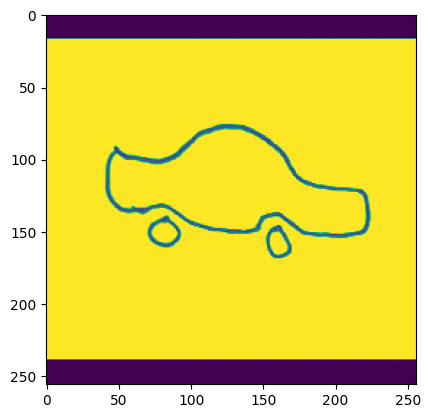

In [36]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np

u_img = cv.imread(path)
u_img = cv2.cvtColor(u_img, cv2.COLOR_BGR2GRAY)
u_img = cv2.convertScaleAbs(u_img, alpha=1.5, beta=10)
plt.imshow(u_img)

ssimarr = []
# before_gray = cv2.cvtColor(u_img, cv2.COLOR_BGR2GRAY)
for i in range(start,end):
    ximg = cv.imread(data['path'][i])
    ximg = cv2.cvtColor(ximg, cv2.COLOR_BGR2GRAY)
    (score, diff) = structural_similarity(u_img, ximg, full=True)
    ssimarr.append([score,data['path'][i]])

len(ssimarr)


In [37]:
import operator
ssimarr = sorted(ssimarr, key=operator.itemgetter(0))

[0.5837984190728773, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04552348_15936.JPEG']
[0.560070060425203, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02690373_3139.JPEG']
[0.5520972395001444, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02690373_18915.JPEG']
[0.5480625268991988, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02692877_10889.JPEG']
[0.5393239618634005, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04252077_1840.JPEG']
[0.5366338455826265, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02690373_6116.JPEG']
[0.5327539749524075, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/ILSVRC2012_val_00020759.JPEG']
[0.5246648272478166, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02692877_3514.JPEG']
[0.5233393047235257, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02782093_3221.JPEG']
[0.5149784384176218, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04552348_7580.JPEG']
[0.5111234650548436, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02692877_6132.JPEG']

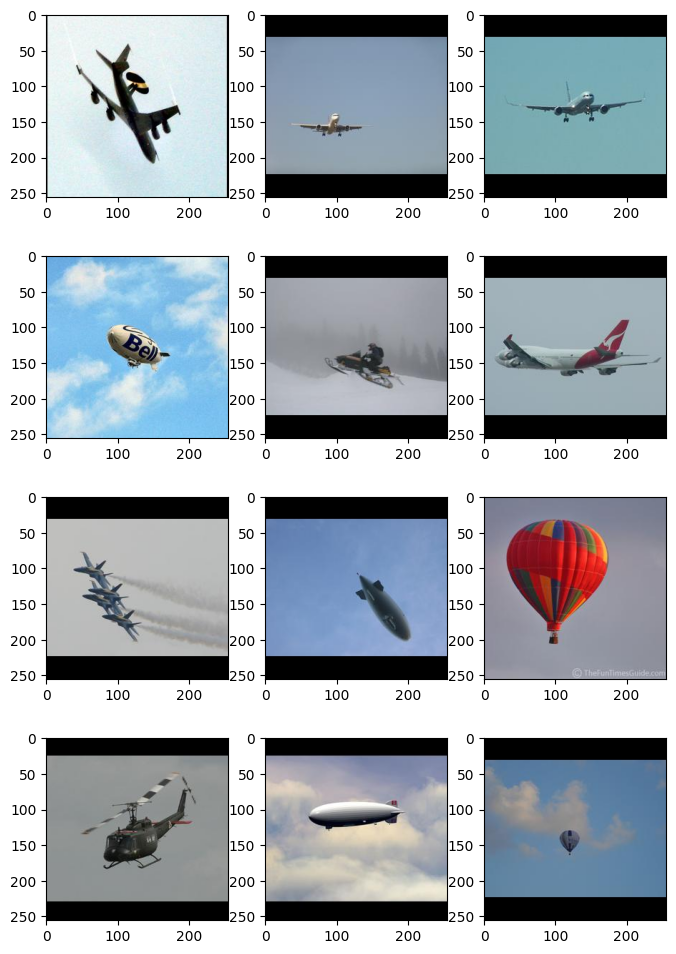

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 12))
rows = 4
columns = 3
for i in range(1,rows*columns+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv.cvtColor(cv.imread(ssimarr[-i][1]), cv.COLOR_BGR2RGB))
    print(ssimarr[-i])
plt.show()

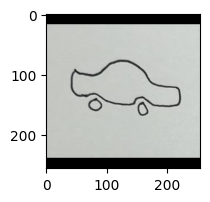

In [39]:
fig = plt.figure(figsize=(3, 2))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))